### Experiment #2 (Clustering Algoritm Comparison)
- Script: clustering_performance.py
- Raw data generation command:
```bash
	$ bin/clustering_performance
```
- Raw data result: Clustering_Performances.xlsx
- Time required: total +/- 10 minutes (10 x 12 sheets x 3 clustering algorithm X 1 MF)

### Default Parameters

In [1]:
from notebook_resolver import *
import inspect
import pandas as pd
from src.utils.excel_operation import export_to_excel
from src.utils.params import get_default_params


file_path = "experiments/Clustering_Performances.xlsx"

default_params = get_default_params()

# Create DataFrame
df = pd.DataFrame(default_params)

export_to_excel(df, file_path, "default_parameters")

### 10x run Performance Chart

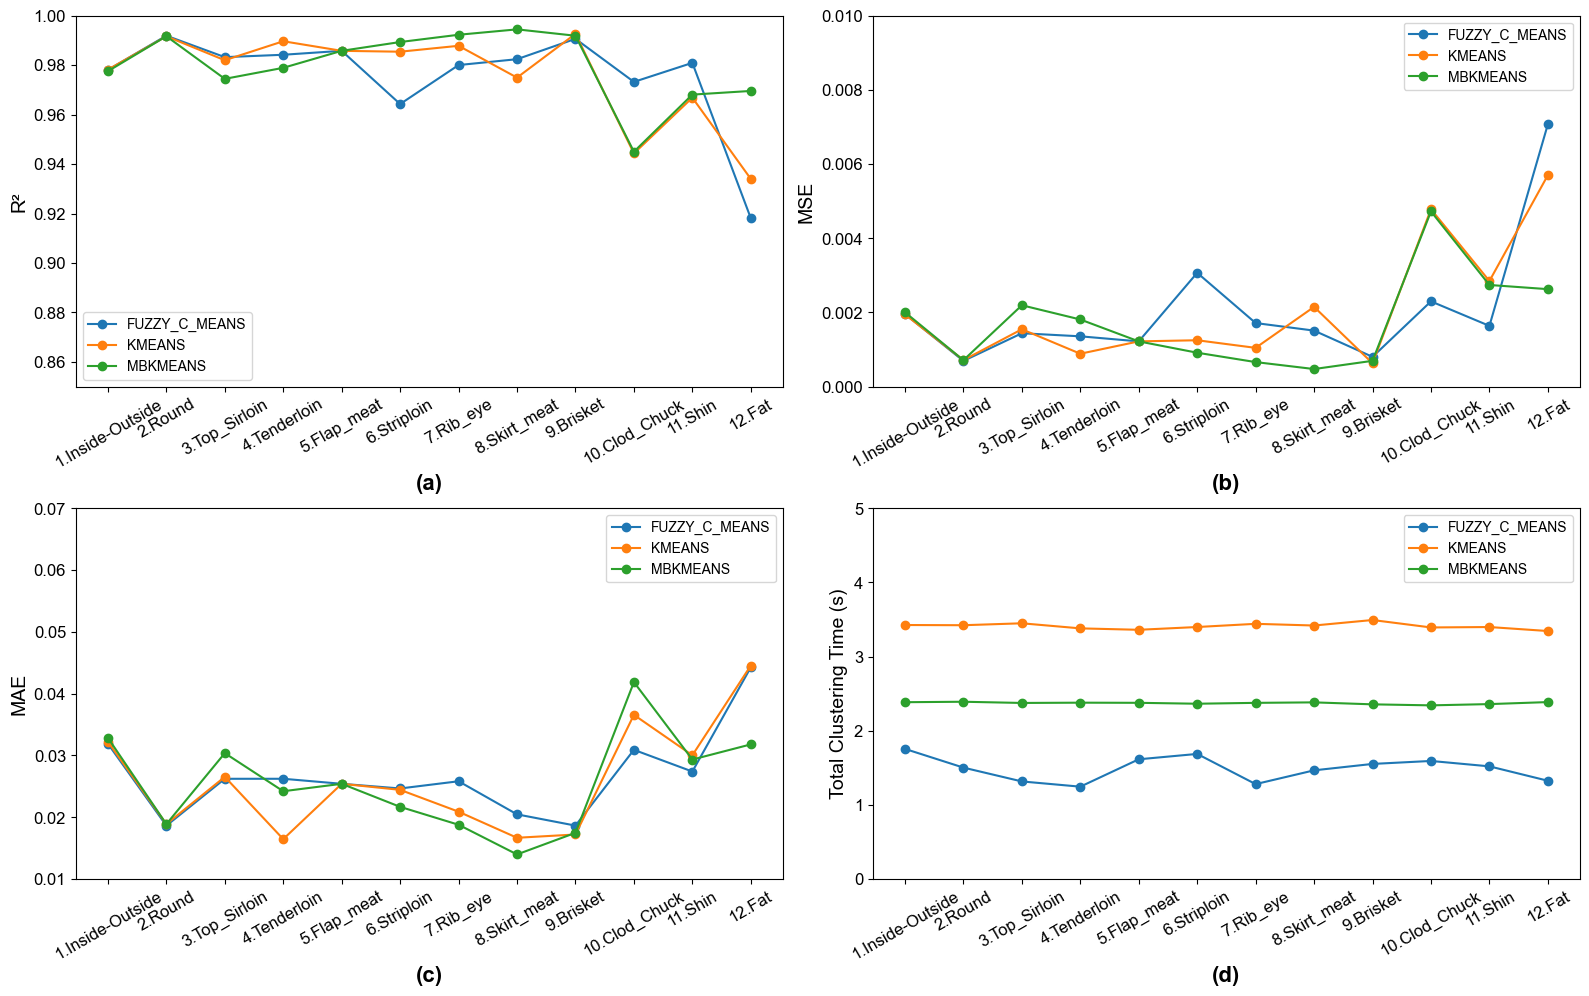

In [2]:

import matplotlib.pyplot as plt

# Load data from Excel (replace with your filename and sheet name if needed)
# Example: df = pd.read_excel("clustering_results.xlsx", sheet_name="Sheet1")
path = "experiments/Clustering_Performances.xlsx"
sheet_name = "clustering_performance"
df = pd.read_excel(path, sheet_name=sheet_name)

df['total_clustering_time'] = (
	df["total_rule_base_clustering_time"] + df["total_features_clustering_time"]
)

df["method"] = df["method"].str.replace("ClusteringMethod.","", regex=False)

df_avg = (
    df.groupby(["method", "Dataset Name"], as_index=False)
      .agg({
          "r2": "mean",
          "mse": "mean",
          "mae": "mean",
          "total_clustering_time": "mean"
      })
)

df_avg["dataset_order"] = df_avg["Dataset Name"].str.extract(r"^(\d+)").astype(int)

# Keep original Dataset Name with prefix as label
df_avg = df_avg.sort_values(["dataset_order", "Dataset Name"])

plt.figure(figsize=(16, 10))
plt.rcParams['font.family'] = 'Arial'

# Define metrics
metrics = {
    "r2": ("R²", "(a)"),
    "mse": ("MSE", "(b)"),
    "mae": ("MAE", "(c)"),
    "total_clustering_time": ("Total Clustering Time (s)", "(d)")
}

y_limits = {
    'r2': (0.85, 1.00),
    'mse': (0, 0.01),
    'mae': (0.010, 0.07),
    'total_clustering_time': (0, 5)
}

for i, (col, (ylabel, title)) in enumerate(metrics.items(), 1):
    plt.subplot(2, 2, i)
    for method, group in df_avg.groupby("method"):
        group = group.sort_values("dataset_order")
        plt.plot(group["Dataset Name"], group[col], marker="o", label=method)

    plt.xticks(rotation=30, fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(title, fontsize=16, fontweight='bold', y=-0.3)
    plt.legend()

    plt.ylim(y_limits.get(col, None))

plt.tight_layout()
plt.show()


### 10x run Computation Time analysis

In [3]:
# Create comprehensive analysis including both speed and R² performance
speed_analysis = df.pivot_table(
    values=['total_clustering_time', 'r2'], 
    index='Dataset Name', 
    columns='method', 
    aggfunc='mean'
).round(4).reset_index()

# Flatten column names for easier access
speed_analysis.columns = ['_'.join(col).strip() if col[1] else col[0] for col in speed_analysis.columns.values]

# Rename columns for clarity
speed_analysis = speed_analysis.rename(columns={
    'total_clustering_time_FUZZY_C_MEANS': 'FCM_time',
    'total_clustering_time_KMEANS': 'KMEANS_time', 
    'total_clustering_time_MBKMEANS': 'MBKMEANS_time',
    'r2_FUZZY_C_MEANS': 'FCM_r2',
    'r2_KMEANS': 'KMEANS_r2',
    'r2_MBKMEANS': 'MBKMEANS_r2'
})

# Calculate speed ratios
# speed_analysis['K_means_vs_FCM_time_ratio'] = (speed_analysis['KMEANS_time'] / 
#                                               speed_analysis['FCM_time']).round(2)
# speed_analysis['MBK_means_vs_FCM_time_ratio'] = (speed_analysis['MBKMEANS_time'] / 
#                                                 speed_analysis['FCM_time']).round(2)
speed_analysis['K_means_vs_MBK_time_ratio'] = (speed_analysis['KMEANS_time'] /
											   speed_analysis['MBKMEANS_time']).round(2)
speed_analysis['FCM_vs_MBK_time_ratio'] = (speed_analysis['FCM_time'] /
										   speed_analysis['MBKMEANS_time']).round(2)

# Add dataset ordering for proper sorting
speed_analysis["dataset_order"] = speed_analysis["Dataset Name"].str.extract(r"(\d+)").astype(int)
speed_analysis = speed_analysis.sort_values(["dataset_order", "Dataset Name"])

# Select only numeric columns (exclude method and Dataset Name)
numeric_cols = speed_analysis.drop(columns=["Dataset Name"])

# Calculate the mean of each numeric column
column_means = numeric_cols.mean().round(4)

average_row = pd.DataFrame([['-'] + list(column_means)], columns=['method'] + list(column_means.index))
speed_analysis_df = pd.concat([speed_analysis, average_row], ignore_index=True)
speed_analysis_df.loc[df.index[12], "Dataset Name"] = "Average"
speed_analysis_df = speed_analysis_df.drop(columns=["method", "dataset_order"])
# speed_analysis_df["K_means_vs_FCM_time_ratio"] = speed_analysis_df["K_means_vs_FCM_time_ratio"].round(2)
# speed_analysis_df["MBK_means_vs_FCM_time_ratio"] = speed_analysis_df["MBK_means_vs_FCM_time_ratio"].round(2)
speed_analysis_df["K_means_vs_MBK_time_ratio"] = speed_analysis_df["K_means_vs_MBK_time_ratio"].round(2)
speed_analysis_df["FCM_vs_MBK_time_ratio"] = speed_analysis_df["FCM_vs_MBK_time_ratio"].round(2)

In [4]:
export_to_excel(speed_analysis_df, file_path, "speed_analysis")

In [5]:
speed_analysis_df

,Dataset Name,FCM_r2,KMEANS_r2,MBKMEANS_r2,FCM_time,KMEANS_time,MBKMEANS_time,K_means_vs_MBK_time_ratio,FCM_vs_MBK_time_ratio
0,1.Inside-Outside,0.9781,0.9782,0.9776,1.7552,3.4256,2.3849,1.44,0.74
1,2.Round,0.9919,0.9917,0.9917,1.5031,3.4229,2.3910,1.43,0.63
2,3.Top_Sirloin,0.9833,0.9820,0.9745,1.3165,3.4489,2.3748,1.45,0.55
3,4.Tenderloin,0.9842,0.9897,0.9789,1.2460,3.3804,2.3785,1.42,0.52
4,5.Flap_meat,0.9858,0.9858,0.9858,1.6152,3.3612,2.3766,1.41,0.68
5,6.Striploin,0.9643,0.9855,0.9894,1.6875,3.3987,2.3644,1.44,0.71
6,7.Rib_eye,0.9801,0.9878,0.9923,1.2806,3.4417,2.3762,1.45,0.54
7,8.Skirt_meat,0.9824,0.9750,0.9945,1.4663,3.4189,2.3827,1.43,0.62
8,9.Brisket,0.9907,0.9927,0.9919,1.5526,3.4930,2.3560,1.48,0.66
9,10.Clod_Chuck,0.9732,0.9443,0.9450,1.5928,3.3928,2.3423,1.45,0.68
